# Economical Indexes Analysis
Analyze economic indicators to understand their relationships, redundancy, and usability in modeling.

**Goals:**
- Plot trends of indicators (already done previously)
- Correlation matrix between indicators
- Variance Inflation Factor (VIF) calculation
- Select usable indicators for modeling

📊 Using `customer_shopping_data_v8_monthly.csv` as input.

In [1]:
# 1️⃣ Imports & Data loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Load data
df = pd.read_csv("../datasets/customer_shopping_data_v8_monthly.csv")
df['month_key'] = pd.to_datetime(df['month_key'])

# Select only economic indicators columns
econ_cols = ["Econ_Conf", "Cons_Conf", "RealSec_Conf", "Serv_Conf", "Retail_Conf", "Constr_Conf"]

df_econ = df[econ_cols].copy()
df_econ.head()


,Econ_Conf,Cons_Conf,RealSec_Conf,Serv_Conf,Retail_Conf,Constr_Conf
0,96.7034,83.2669,109.0,101.8711,108.5360,84.1690
1,96.0306,84.5152,108.7,100.3978,108.9394,83.0765
2,99.4866,86.6538,110.2,105.5024,109.2033,79.7576
3,94.2098,80.1716,107.4,103.3467,103.0694,77.2976
4,92.9693,77.2622,107.1,102.2168,100.8794,79.6084


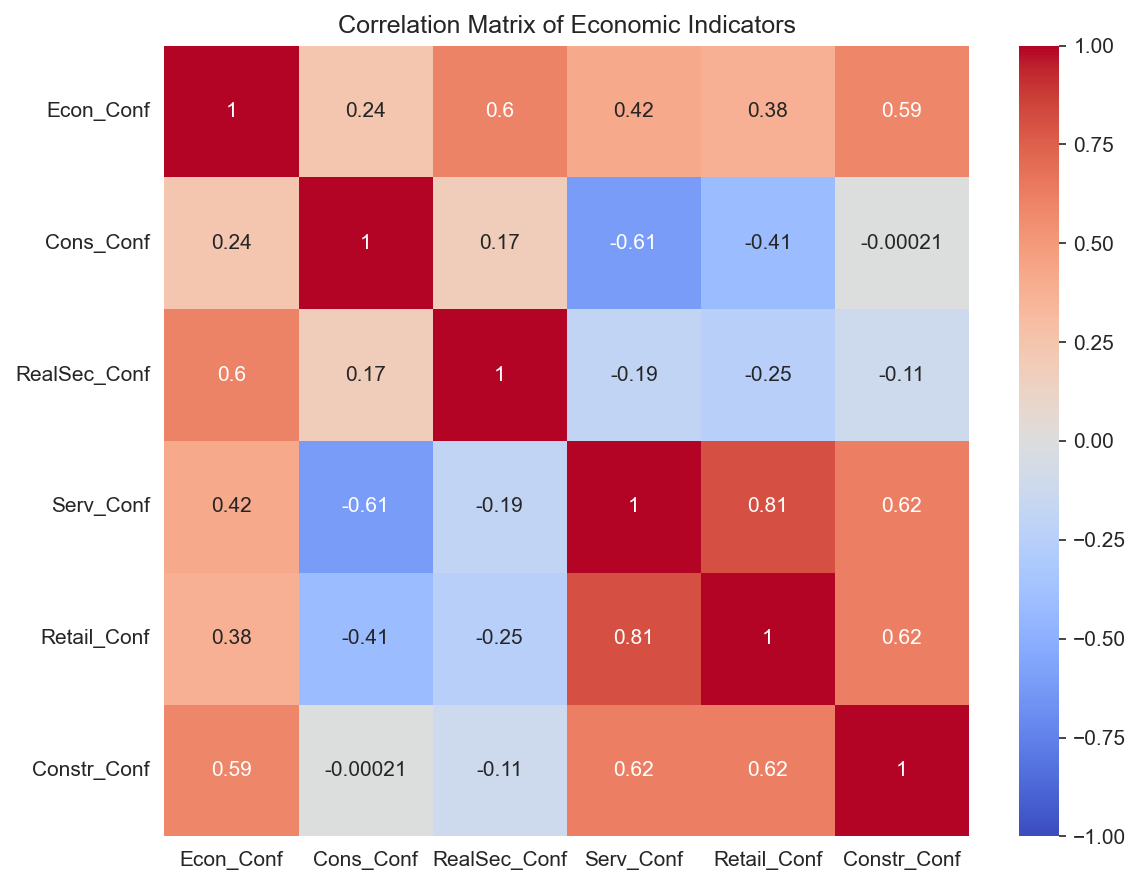

In [3]:
# 2️⃣ Correlation Matrix
plt.figure(figsize=(8,6), dpi=150)
sns.heatmap(df_econ.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Economic Indicators")
plt.tight_layout()
plt.savefig("../explatory_data_analysis/economical_indexes_analysis_figures/economical_indexes_analysis_figures.png")
plt.show()


In [3]:
# 3️⃣ VIF Calculation
# Add constant term for intercept
X = add_constant(df_econ)

# Calculate VIF for each variable
vif_df = pd.DataFrame({
    "Variable": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display VIF values
vif_df


,Variable,VIF
0,const,44992.749189
1,Econ_Conf,325.057054
2,Cons_Conf,137.722477
3,RealSec_Conf,152.047064
4,Serv_Conf,207.038580
5,Retail_Conf,7.273711
6,Constr_Conf,6.184982


### Removed Indicators: Services Confidence, Retail Trade Confidence, Construction Confidence

- **Services Confidence** and **Retail Trade Confidence** indices showed extremely high correlation (~0.9) with the Real Sector Confidence Index, causing redundancy and multicollinearity risk. To simplify the model and avoid overlapping information, both were excluded.

- **Construction Confidence** index, while not severely correlated, was excluded based on domain relevance: construction sector dynamics are not directly related to consumer shopping behavior in this context.


              Econ_Conf  Cons_Conf  RealSec_Conf
Econ_Conf      1.000000   0.237720      0.604723
Cons_Conf      0.237720   1.000000      0.174675
RealSec_Conf   0.604723   0.174675      1.000000


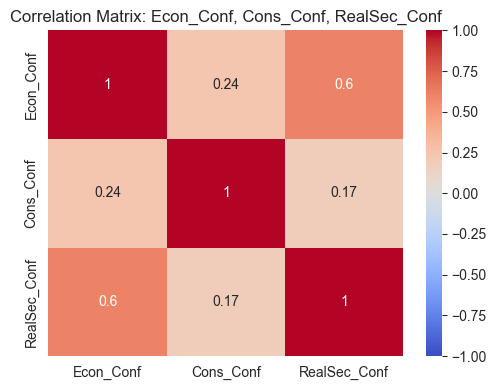

In [5]:
# Correlation matrix for selected 3 indicators
selected_cols = ["Econ_Conf", "Cons_Conf", "RealSec_Conf"]

corr_selected = df[selected_cols].corr()

print(corr_selected)

# Optional: plot heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 4))
sns.heatmap(corr_selected, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix: Econ_Conf, Cons_Conf, RealSec_Conf")
plt.tight_layout()
plt.show()


In [4]:
# VIF calculation for selected 3 indicators
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select the 3 indicators
selected_cols = ["Econ_Conf", "Cons_Conf", "RealSec_Conf"]

# Prepare data
X_selected = add_constant(df[selected_cols])

# Calculate VIF
vif_df_selected = pd.DataFrame({
    "Variable": X_selected.columns,
    "VIF": [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]
})

# Print VIF
print(vif_df_selected)


       Variable          VIF
0         const  1185.591155
1     Econ_Conf     1.622550
2     Cons_Conf     1.061591
3  RealSec_Conf     1.579037


### Final Selection Justification: Cons_Conf, Econ_Conf, RealSec_Conf

After excluding the highly correlated Services and Retail Trade Confidence Indices, we re-evaluated the remaining three selected indicators:

- **Variance Inflation Factor (VIF):** All three indicators showed low VIF values (below 2), indicating no multicollinearity concerns.
- **Correlation Matrix:** The highest pairwise correlation was 0.6 between Economic Confidence Index and Real Sector Confidence Index. This is considered a moderate level and does not indicate problematic redundancy.

**Conclusion:**  
Consumer Confidence Index and Economic Confidence Index provide complementary perspectives on consumer sentiment and macroeconomic environment. Real Sector Confidence Index captures production-side dynamics, which are not fully represented by the other two indicators. Given the acceptable correlation level and low VIF, retaining all three indicators is ju


Correlation Matrix:
                      bloomberg_confidence  oecd_confidence  ipsos_confidence  \
bloomberg_confidence              1.000000         0.716075          0.661978   
oecd_confidence                   0.716075         1.000000          0.586422   
ipsos_confidence                  0.661978         0.586422          1.000000   
Econ_Conf                         0.009447         0.167053          0.035666   
Cons_Conf                         0.682784         0.959799          0.579414   
RealSec_Conf                     -0.386267         0.138270         -0.348527   

                      Econ_Conf  Cons_Conf  RealSec_Conf  
bloomberg_confidence   0.009447   0.682784     -0.386267  
oecd_confidence        0.167053   0.959799      0.138270  
ipsos_confidence       0.035666   0.579414     -0.348527  
Econ_Conf              1.000000   0.237720      0.604723  
Cons_Conf              0.237720   1.000000      0.174675  
RealSec_Conf           0.604723   0.174675      1.000000  

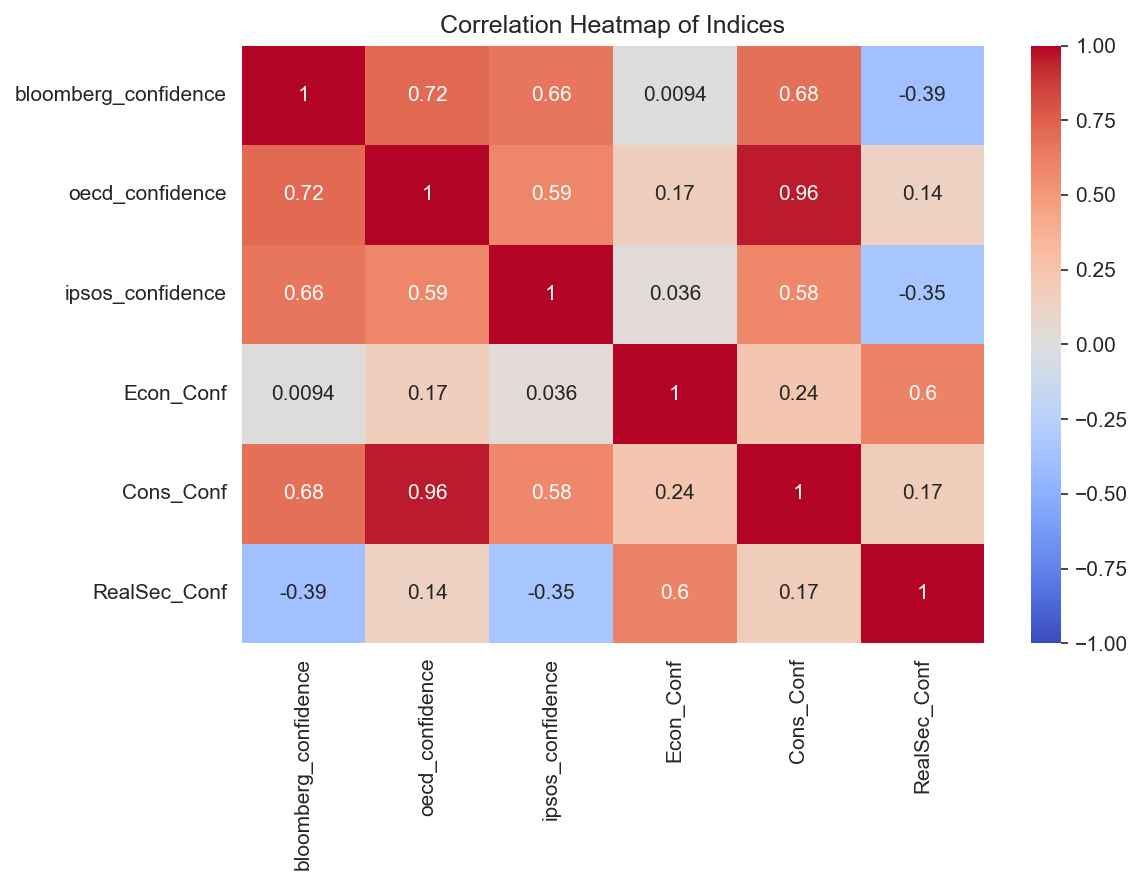

In [5]:
import seaborn as sns

df = pd.read_csv("../datasets/customer_shopping_data_v16_monthly.csv")

# Select index columns
index_cols = [
    "bloomberg_confidence",
    "oecd_confidence",
    "ipsos_confidence",
    "Econ_Conf",
    "Cons_Conf",
    "RealSec_Conf"
]

# Compute correlation matrix
corr_matrix = df[index_cols].corr()

print("Correlation Matrix:")
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(8, 6), dpi=150)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Indices")
plt.tight_layout()
plt.savefig("../explatory_data_analysis/economical_indexes_analysis_figures/economical_indexes_analysis_figures_2.png")
plt.show()


Correlation Matrix:
                      bloomberg_confidence  ipsos_confidence  Econ_Conf  \
bloomberg_confidence              1.000000          0.661978   0.009447   
ipsos_confidence                  0.661978          1.000000   0.035666   
Econ_Conf                         0.009447          0.035666   1.000000   
Cons_Conf                         0.682784          0.579414   0.237720   
RealSec_Conf                     -0.386267         -0.348527   0.604723   

                      Cons_Conf  RealSec_Conf  
bloomberg_confidence   0.682784     -0.386267  
ipsos_confidence       0.579414     -0.348527  
Econ_Conf              0.237720      0.604723  
Cons_Conf              1.000000      0.174675  
RealSec_Conf           0.174675      1.000000  


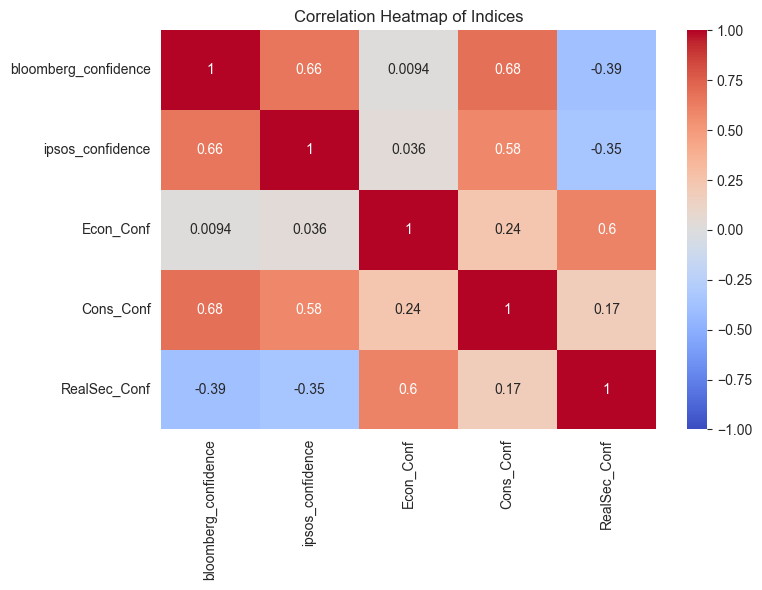

In [6]:
import seaborn as sns

df = pd.read_csv("../datasets/customer_shopping_data_v16_monthly.csv")

# Select index columns
index_cols = [
    "bloomberg_confidence",
    "ipsos_confidence",
    "Econ_Conf",
    "Cons_Conf",
    "RealSec_Conf"
]

# Compute correlation matrix
corr_matrix = df[index_cols].corr()

print("Correlation Matrix:")
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Indices")
plt.tight_layout()
plt.savefig("../explatory_data_analysis/economical_indexes_analysis_figures/economical_indexes_analysis_figures_3.png")
plt.show()
